In [97]:
import pandas as pd
import numpy as np

In [98]:
import matplotlib.pyplot as plt
import seaborn as sbs

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [101]:
%matplotlib inline

In [102]:
# Load data

In [103]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
truth_data = pd.read_csv('gender_submission.csv')

In [ ]:
# Check shapes

In [104]:
train_data.shape

(891, 12)

In [105]:
test_data.shape

(418, 11)

In [106]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [107]:
# Clean train data set

In [108]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

In [109]:
# Start to explore data

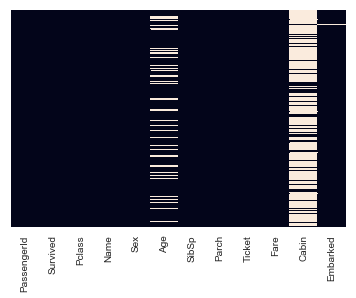

In [110]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

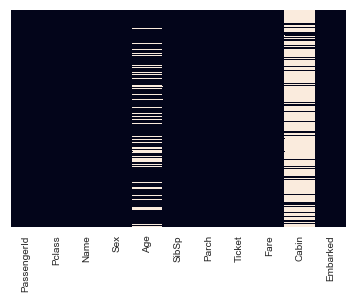

In [111]:
sbs.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [112]:
# We can clean Age a little bit. 
# But Cabin should be removed or transformed

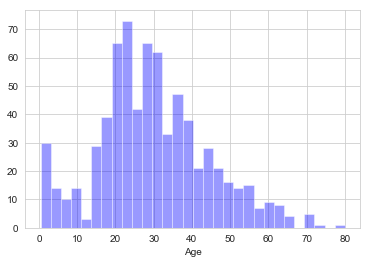

In [113]:
sbs.set_style('whitegrid')
sbs.distplot(train_data['Age'].dropna(), kde=False, color='blue', bins=30)

In [114]:
# Looks qute normal, like normal distribution...

In [115]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


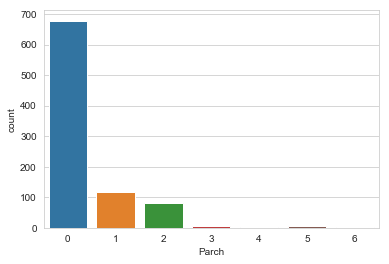

In [116]:
sbs.countplot('Parch',data=train_data)

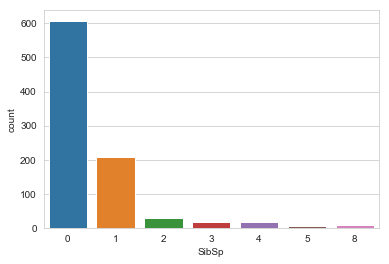

In [117]:
sbs.countplot('SibSp',data=train_data)

In [118]:
# Lets check about Fare

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


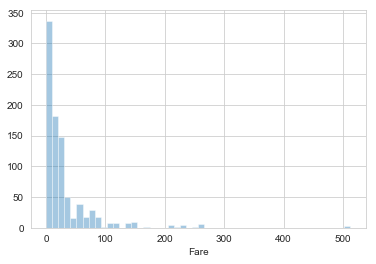

In [119]:
sbs.distplot(train_data['Fare'].dropna(),kde=False)

In [120]:
# Time to clean data

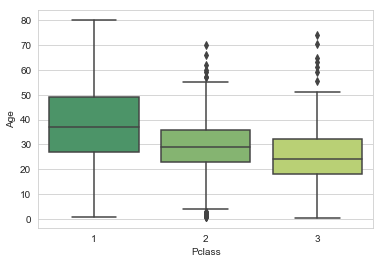

In [121]:
sbs.boxplot(x='Pclass', y='Age', data=train_data, palette='summer')

In [122]:
# Older = wealthier

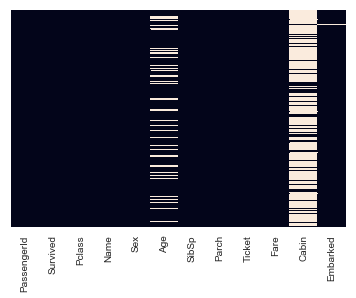

In [123]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

In [124]:
# Still need to clean Age and Cabin
# Starting from Age
# Will replace all NaN-s with mean value in ticket class

In [125]:
def get_mean_from_class(cl):
    if cl >= 1 and cl <= 3:
        return train_data[train_data['Pclass'] == cl]['Age'].mean()
    else:
        return 0

def mean_age_by_classes(columns):
    mean_3 = get_mean_from_class(3)
    mean_2 = get_mean_from_class(2)
    mean_1 = get_mean_from_class(1)
    
    Age = columns[0]
    Pclass = columns[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return mean_1
        elif Pclass == 2:
            return mean_2
        else:
            return mean_3
    else:
        return Age

In [126]:
train_data['Age'] = train_data[['Age','Pclass']].apply(mean_age_by_classes,axis=1)
test_data['Age'] = test_data[['Age','Pclass']].apply(mean_age_by_classes,axis=1)

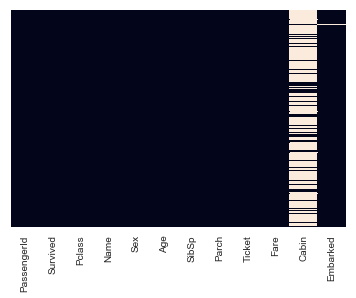

In [127]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

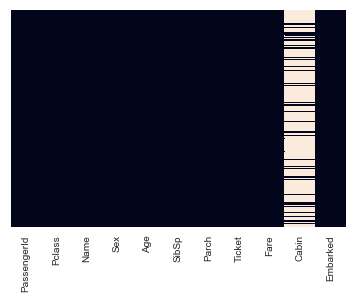

In [128]:
sbs.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [129]:
# Age is clear
# It is time for cabin

In [130]:
train_data['Cabin'].fillna('U', inplace=True)
train_data['Cabin'] = train_data['Cabin'].astype(str).str[0]
test_data['Cabin'].fillna('U', inplace=True)
test_data['Cabin'] = train_data['Cabin'].astype(str).str[0]

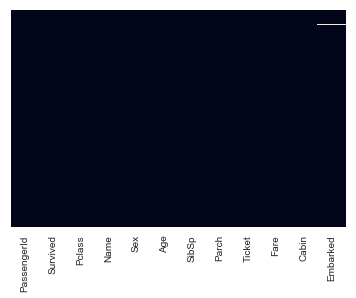

In [131]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

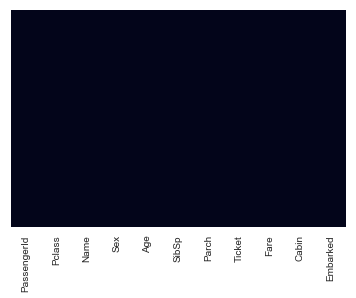

In [132]:
sbs.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [133]:
# Better
# Still have some NaN, will deal with it later
# Time to convert categorical features into dummies and remove PassengerId

In [134]:
sex_d = pd.get_dummies(train_data['Sex'], drop_first=True)
embark_d = pd.get_dummies(train_data['Embarked'], drop_first=True)
cabin_d = pd.get_dummies(train_data['Cabin'], drop_first=True)
pclass_d = pd.get_dummies(train_data['Pclass'], drop_first=True)

In [135]:
train_data.drop(columns=['PassengerId'],inplace = True)
train_data = pd.concat([train_data, sex_d, embark_d, pclass_d, cabin_d], axis=1)

In [136]:
sex_d_te = pd.get_dummies(test_data['Sex'], drop_first=True)
embark_d_te = pd.get_dummies(test_data['Embarked'], drop_first=True)
cabin_d_te = pd.get_dummies(test_data['Cabin'], drop_first=True)
pclass_d_te = pd.get_dummies(test_data['Pclass'], drop_first=True)

In [137]:
test_data.drop(columns=['PassengerId'],inplace = True)
test_data = pd.concat([test_data, sex_d_te, embark_d_te, pclass_d_te,cabin_d_te], axis=1)

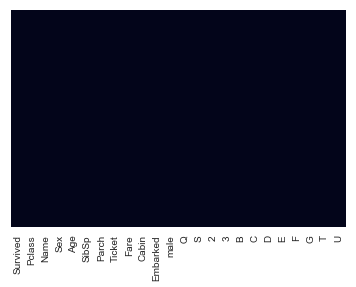

In [138]:
sbs.heatmap(train_data.isnull(), yticklabels=False, cbar=False)

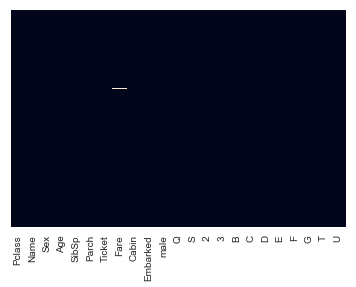

In [139]:
sbs.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [ ]:
# This time Fare is a problem
# Also remove Survived as not needed
# In fact, no inplace, so survived still there

In [140]:
train_data.drop('Survived',axis=1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,2,3,B,C,D,E,F,G,T,U
0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,U,S,...,0,1,0,0,0,0,0,0,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,C,...,0,0,0,1,0,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,U,S,...,0,1,0,0,0,0,0,0,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C,S,...,0,0,0,1,0,0,0,0,0,0
4,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,U,S,...,0,1,0,0,0,0,0,0,0,1
5,3,"Moran, Mr. James",male,25.14062,0,0,330877,8.4583,U,Q,...,0,1,0,0,0,0,0,0,0,1
6,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,17463,51.8625,E,S,...,0,0,0,0,0,1,0,0,0,0
7,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,349909,21.0750,U,S,...,0,1,0,0,0,0,0,0,0,1
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,347742,11.1333,U,S,...,0,1,0,0,0,0,0,0,0,1
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,237736,30.0708,U,C,...,1,0,0,0,0,0,0,0,0,1


In [141]:
# Check columns again

In [142]:
train_data.columns

Index(['Survived',   'Pclass',     'Name',      'Sex',      'Age',    'SibSp',
          'Parch',   'Ticket',     'Fare',    'Cabin', 'Embarked',     'male',
              'Q',        'S',          2,          3,        'B',        'C',
              'D',        'E',        'F',        'G',        'T',        'U'],
      dtype='object')

In [143]:
# Drop not needed columns

In [144]:
train_data.drop(['Pclass','Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)
test_data.drop(['Pclass','Sex','Embarked','Name','Cabin','Ticket'],axis=1,inplace=True)

In [ ]:
# And check

In [145]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,B,C,D,E,F,G,T,U
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,1


In [146]:
test_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,B,C,D,E,F,G,T,U
0,34.5,0,0,7.8292,1,1,0,0,1,0,0,0,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1,0,1,0,0,0,0,0,0
2,62.0,0,0,9.6875,1,1,0,1,0,0,0,0,0,0,0,0,1
3,27.0,0,0,8.6625,1,0,1,0,1,0,1,0,0,0,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,0,0,0,0,0,1


In [ ]:
# We need to remove survived again

In [147]:
train_data.drop(['Survived'],axis=1,inplace=True)

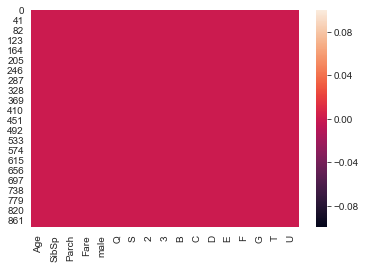

In [149]:
sbs.heatmap(train_data.isnull())

In [150]:
test_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,B,C,D,E,F,G,T,U
0,34.5,0,0,7.8292,1,1,0,0,1,0,0,0,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1,0,1,0,0,0,0,0,0
2,62.0,0,0,9.6875,1,1,0,1,0,0,0,0,0,0,0,0,1
3,27.0,0,0,8.6625,1,0,1,0,1,0,1,0,0,0,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,0,0,0,0,0,1


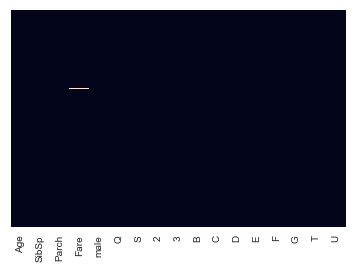

In [151]:
sbs.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

In [152]:
# And replace

In [153]:
test_data['Fare'].fillna(0, inplace=True)
train_data['Fare'].fillna(0, inplace=True)

In [154]:
train_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,B,C,D,E,F,G,T,U
0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1
1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,0,0,0,0
4,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,1


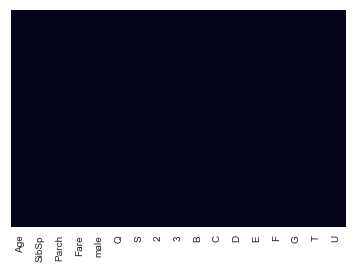

In [155]:
sbs.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

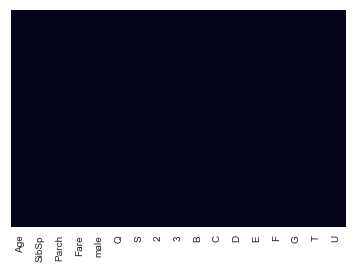

In [156]:
sbs.heatmap(test_data.isnull(),yticklabels=False,cbar=False)

In [ ]:
# We will extract column with information if passanger have child.
# So we will create helper function

In [157]:
def isChild(columns):
    Age = columns[0]
    if(Age < 18):
        return 1
    else:
        return 0

In [158]:
train_data['IsChild'] = train_data[['Age']].apply(isChild,axis=1)
test_data['IsChild'] = test_data[['Age']].apply(isChild,axis=1)

In [160]:
train_data.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,B,C,D,E,F,G,T,U,IsChild
0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,0,0,0,0,1,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,0,0,0,1,0
3,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
# Now is the time, train the model

In [161]:
logmodel = LogisticRegression()
logmodel.fit(train_data,train_data_copy['Survived'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Check model

In [162]:
predictions = logmodel.predict(test_data)

In [163]:
predictions.shape

(418,)

In [164]:
truth_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1055]:
# First try, so bad - small data set

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       255
           1       0.50      0.04      0.07       163

   micro avg       0.61      0.61      0.61       418
   macro avg       0.56      0.51      0.41       418
weighted avg       0.57      0.61      0.49       418



In [1084]:
# Another try, also bad, not enouth features

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       255
           1       0.50      0.04      0.07       163

   micro avg       0.61      0.61      0.61       418
   macro avg       0.56      0.51      0.41       418
weighted avg       0.57      0.61      0.49       418



In [1092]:
# Wrong way of changing model, results even worst

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       255
           1       0.45      0.03      0.06       163

   micro avg       0.61      0.61      0.61       418
   macro avg       0.53      0.50      0.40       418
weighted avg       0.55      0.61      0.48       418



In [173]:
# Learned a little bit, update number of features, extract 
print(classification_report(truth_data['Survived'],predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       266
           1       0.91      0.89      0.90       152

   micro avg       0.93      0.93      0.93       418
   macro avg       0.93      0.92      0.92       418
weighted avg       0.93      0.93      0.93       418



In [ ]:
# Create .csv file

In [170]:
predictions_dt = pd.DataFrame()
predictions_dt['PassengerId'] = test_data_copy['PassengerId'].tolist()
predictions_dt['Survived'] = predictions

In [171]:
predictions_dt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1656]:
predictions_dt.shape

(891, 2)

In [174]:
predictions_dt.to_csv('predictions',sep=',', encoding='utf-8', index=False)

In [ ]:
# We have our own model